<a href="https://colab.research.google.com/github/hyojunyee/kita_2404/blob/main/m5_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/ML_%ED%9A%8C%EA%B7%80_0729.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 경사하강법

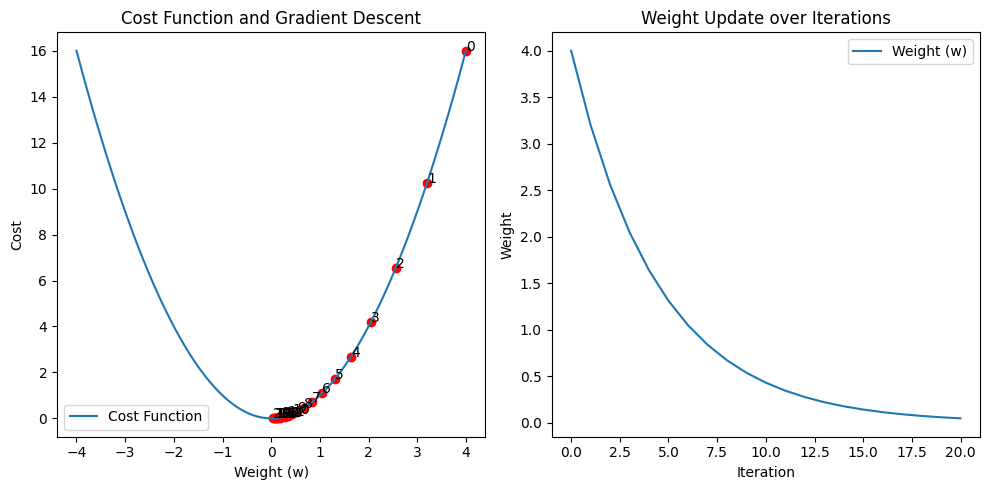

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 비용 함수와 그 기울기 정의
def cost_function(w):
    return w ** 2

def gradient(w):
    return 2 * w

# 초기 가중치 설정
w = 4
learning_rate = 0.1
iterations = 20

# 가중치 업데이트 기록을 저장할 리스트
weights = [w]
costs = [cost_function(w)]

# 경사하강법 수행
for _ in range(iterations):
    grad = gradient(w)
    w = w - learning_rate * grad
    weights.append(w)
    costs.append(cost_function(w))

# 시각화
plt.figure(figsize=(10, 5))

# 비용 함수 시각화
plt.subplot(1, 2, 1)
w_values = np.linspace(-4, 4, 100)
cost_values = cost_function(w_values)
plt.plot(w_values, cost_values, label='Cost Function')
plt.scatter(weights, costs, color='red')
for i in range(len(weights)):
    plt.annotate(f'{i}', (weights[i], costs[i]))
plt.xlabel('Weight (w)')
plt.ylabel('Cost')
plt.title('Cost Function and Gradient Descent')
plt.legend()

# 가중치 업데이트 시각화
plt.subplot(1, 2, 2)
plt.plot(weights, label='Weight (w)')
plt.xlabel('Iteration')
plt.ylabel('Weight')
plt.title('Weight Update over Iterations')
plt.legend()

plt.tight_layout()
plt.show()

비용 함수와 경사하강법
- 좌측 그래프는 비용 함수 f(w)=$w^2$ 의 그래프입니다.
- 빨간 점들은 각 반복(iteration)에서 가중치 w와 그에 따른 비용 함수 값을 나타냅니다.
점들은 초기 가중치 $w_{0}$ = 4에서 시작하여, 반복적으로 기울기를 따라 비용 함수의 최소값 w=0으로 수렴합니다.

가중치 업데이트 과정:
- 우측 그래프는 반복에 따른 가중치 w의 변화를 나타냅니다.
- 초기 가중치에서 시작하여, 각 반복마다 가중치가 점점 줄어들어 최적의 값에 수렴하는 것을 보여줍니다.

요약
- 기울기(Gradient): 특정 지점에서 비용 함수가 증가하는 방향과 크기를 나타내는 벡터입니다.
- 경사하강법(Gradient Descent): 기울기를 따라 가중치를 업데이트하여 비용 함수의 최솟값을 찾는 최적화 알고리즘입니다.
- 가중치 업데이트: 가중치는 기울기의 반대 방향으로 업데이트됩니다. 이는 비용 함수 값을 줄이기 위함입니다.
- 시각화: 비용 함수와 가중치 업데이트 과정을 시각화하여 경사하강법이 어떻게 작동하는지 알기 쉽게 보여줍니다.

이 시각화를 통해 경사하강법이 어떻게 작동하는지, 즉 초기 가중치에서 시작하여 기울기를 따라 내려가면서 비용 함수를 최소화하는 방향으로 가중치를 업데이트하는 과정을 쉽게 이해할 수 있습니다.

In [ ]:
import pandas as pd
import numpy as np
# linspace 어떤 구간(여기서는 500-1000사이)을 나눠서 개수(100개) 데이터를 만들어줌.
X = np.linspace(500,1000,100)
pd.Series(X).describe()

count     100.000000
mean      750.000000
std       146.522687
min       500.000000
25%       625.000000
50%       750.000000
75%       875.000000
max      1000.000000
dtype: float64

In [ ]:
# 평균이 0에 가깝고, 표준편차가 10에 가까운 정규분포 만들기
noise = np.random.normal(0, 10, len(X))
pd.Series(noise).describe()

count    100.000000
mean       0.223046
std        9.536690
min      -19.187712
25%       -8.056605
50%        0.841072
75%        5.381704
max       27.201692
dtype: float64

Coefficients: [0.20241681]
Mean squeared error: 62.2
Coefficent of determination: 0.93


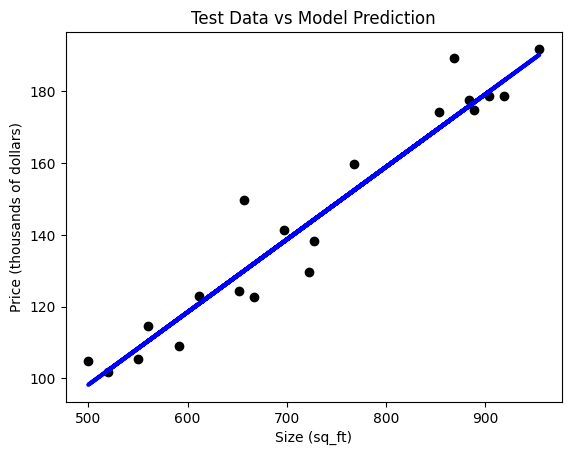

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Example dataset
data = {'Size': np.linspace(500,1000,100)}
df = pd.DataFrame(data)

# Add a 'Pirce column tat is linearly dependent on 'Size' with some noise
np.random.seed(42)
noise = np.random.normal(0, 10, len(df['Size']))        # generate some noise
# noise = np.random.normal(0, 100, len(df['Size']))
df['Price'] = df['Size'] * 0.2 + noise

# Define the predictor variable (X) and the target variable (y)
# X는 데이터의 특성을 나타내는 이차원 배열이고 여러 특성을 포함할 수 있는 구조를 갖는 반면
# y는 예측하고자 하는 타겟 값을 나타내는 일차원 배열로 각 데이터 포인트에 대한 단일 출력값을 갖는다.
# 이러한 구조는 대부분의 머신러닝 라이브러리들에서 표준적으로 사용되며 데이터의 구조를 명확하게 하고
# 모델링 과정을 간소화하는데 도움이 된다.
X = df[['Size']]        # Predictor variabel
y = df['Price']         #  Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
# r2 score
r2_score = r2_score(y_test, y_pred)

# The coefficients
print(f'Coefficients: {model.coef_}')
# Mean squeared error
print(f'Mean squeared error: {round(mse,2)}')
# Coefficent of determination (R2)
print(f'Coefficent of determination: {round(r2_score, 2)}')

# Plot outputs
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Size (sq_ft)')
plt.ylabel('Price (thousands of dollars)')
plt.title('Test Data vs Model Prediction')
plt.show()

### 회귀 모델 평가

평균 제곱 오차(MSE):
- MSE는 오차의 제곱의 평균, 즉 추정값과 실제값의 차이의 평균제곱을 측정.MSE가 낮을수록 더 나은 적합성을 나타내지만 이상값에 민감할 수 있다.

RMSE(제곱 평균 오차):
- RMSE는 MSE의 제곱근으로 반응변수와 단위가 동일. 큰 오류에 상대적으로 높은 가중치를 부여하므로 큰 오류가 특히 바람직하지 않은 경우 유용.

평균 절대 오차(MAE):
- MAE는 방향을 고려하지 않고 추정값과 실제값 사이의 평균 거리, 즉 절대 오차의 평균을 측정. MSE 및 RMSE에 비해 이상값에 덜 민감.

RMSE vs MAE:
- MAE는 모든 오차를 절대값으로 취급하고, 이를 단순히 평균낸 것. 이 방식은 모든 오차를 동일하게 처리하며, 크기에 관계없이 같은 가중치를 부여.
- RMSE는 먼저 각 오차를 제곱하고, 이들의 평균을 구한 후 마지막으로 제곱근을 취한다. 이 방식은 큰 오차에 더 큰 가중치를 부여함. 따라서, RMSE는 이상값이나 큰 오차에 더 민감하게 반응

R 제곱(결정 계수):
- R-제곱은 독립 변수에서 예측 가능한 종속 변수의 분산 비율을 측정. 범위는 0부터 1까지이며 값이 0이면 모형이 평균 주위의 반응 데이터 변동성을 전혀 설명하지 않는다는 것을 나타내고, 1은 모형이 모든 변동성을 설명한다는 것을 나타낸다.
  - 값의 범위: R-제곱은 0과 1 사이의 값을 가진다. 값이 0에 가까우면 모델이 데이터의 변동을 거의 설명하지 못하는 것이고, 1에 가까우면 데이터의 변동을 거의 완벽하게 설명한다는 의미.
  - 해석: R-제곱 값이 높다는 것은 모델이 데이터에 잘 맞는다는 것을 의미. 예를 들어, R-제곱이 0.9이면, 모델이 종속 변수의 변동의 90%를 설명한다고 해석할 수 있다.
  - 한계: R-제곱만으로 모델의 적합성을 완전히 판단하기는 어렵다. 모델에 불필요한 변수가 추가될 때마다 R-제곱 값은 감소하지 않고, 오히려 증가할 수 있기 때문. 이는 과적합(overfitting)의 가능성을 무시할 수 있음을 의미.
  - R 제곱 = 1 - (잔차의 제곱합/총제곱합) 여기서 총제곱합은 종속변수 값과 그 평균 간의 차이의 제곱합
  - 잔차의 제곱합/총제곱합 비율은 모델이 설명하지 못하는 데이터의 변동성의 비율을 나타낸다. 모델이 완벽하게 데이터를 예측한다면, SS_residual은 0이 되고, R-제곱은 1이 된다. 반대로, 이 비율이 높으면 높을수록 모델이 데이터를 잘 설명하지 못하는 것을 의미하며, R-제곱 값은 낮아진다.

수정된 R-제곱:
- 모델의 예측 변수 수에 대한 R 제곱을 조정합니다. 다양한 수의 독립 변수가 있는 모델을 비교하는 데 유용.
  - 수정된 R-제곱은 모델에 포함된 독립 변수의 수를 고려하여 R-제곱을 조정.
  - 이 조정을 통해 변수의 수가 모델의 성능 평가에 미치는 영향을 감소시킨다.
  - 수정된 R-제곱은 독립 변수의 수가 증가할 때 그 변수들이 모델의 설명력을 실질적으로 향상시키지 않는다면 감소할 수도 있다.
  - 따라서, 수정된 R-제곱은 변수의 수가 많은 모델을 평가할 때 더 신뢰할 수 있는 척도가 된다.
  -  변수의 수가 모델의 성능 평가에 미치는 영향을 조정하며, 모델의 과적합을 방지하는 데 도움을 준다.

교차 검증:
- 데이터를 하위 집합으로 나누고, 일부 하위 집합(훈련 세트)에서 모델을 훈련하고, 나머지 하위 집합(검증 세트)에서 모델을 평가하는 작업이 포함. 일반적인 방법에는 k-겹 교차 검증이 포함됩니다. 여기서는 데이터를 k개의 하위 집합으로 나누고 모델을 k번 훈련하며, 매번 다른 하위 집합을 검증 세트로 사용. 보이지 않는 데이터에 대한 모델 성능에 대한 보다 강력한 추정치를 제공.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the California Housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Adjusted R^2: 독립변수의 수와 표본 크기에 따라 조정한 값
n = X_test.shape[0]  # 데이터 포인트의 수
p = X_test.shape[1]  # 독립 변수의 수
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Cross-validation
# MSE와 같은 손실 함수의 경우 값을 최소화하는 것이 좋음 (MSE가 낮을수록 좋다)
# 이를 점수가 높을수록 더 좋은 scikit-learn의 프레임워크에 맞추기 위해 MSE에 -1을 곱하여 음수 값으로 바꾼다.
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores).mean()

# Print evaluation metrics
print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R-Squared: {r2:.4f}')
print(f'Adjusted R^2: {adjusted_r2:.4f}')
print(f'Cross-validated RMSE: {cv_rmse:.4f}')

# # Plot the actual vs. predicted values
# plt.scatter(y_test, y_pred)
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Actual vs. Predicted Values')
# plt.show()

MSE: 0.5559
MAE: 0.5332
R-Squared: 0.5758
Adjusted R^2: 0.5750
Cross-validated RMSE: 0.7205


시각적 탐색, 다중공선성, 표준화, 로그 변환, 이상치 탐지, 교차검증

**다중공선성**은 독립 변수들 간의 높은 상관관계로 인해 발생하며, 주로 회귀 분석에서 문제를 일으킴. 이는 모델의 해석 가능성에 영향을 주지만 예측 성능 자체에는 큰 영향을 미치지 않을 수 있다.

통계에서는 분산 팽창지수로 다중공선성을 확인
- VIF값이 10을 초과하는 경우 해당 특성 간에 다중공선성이 의심될 수 있다.

영향:
- 회귀 계수의 추정이 불안해지며, 계수의 표준 오차가 증가하여 회귀 모델의 해석이 어려워 질 수 있다.
- 모델의 예측 성능은 유지될 수 있지만, 개별 변수의 중요도를 해석하는 데 문제가 발생할 수 있다.
- 회귀모델의 계수가 큰변동을 일으킬 수 있다.

해결 방법
- 상관관계가 높은 변수를 제거하거나 결합
- 주성분 분석(PCA)등 차원 축소 기법 적용
- 릿지 회귀(Ridge Regression) 등의 정규화 기법 사용



데이터셋은 여러 개의 특성(피처)과 타겟 변수로 구성됩니다. 각 행은 하나의 지리적 블록 그룹(일종의 작은 행정 구역)에 해당하며, 각 특성은 해당 블록 그룹의 통계적 정보입니다.

- MedInc: Median Income in block group - 블록 그룹의 중간 소득 (단위:  $10,000).
- HouseAge: Median House Age in block group - 블록 그룹의 중간 주택 연령 (단위: 년).
- AveRooms: Average Number of Rooms per Household - 가구당 평균 방 개수.
- AveBedrms: Average Number of Bedrooms per Household - 가구당 평균 침실 개수.
- Population: Population in block group - 블록 그룹 내 인구 수.
- AveOccup: Average Number of Occupants per Household - 가구당 평균 거주자 수.
- Latitude: Latitude of block group - 블록 그룹의 위도.
- Longitude: Longitude of block group - 블록 그룹의 경도.

타겟 변수
- MedHouseVal: Median House Value in block group - 블록 그룹의 중간 주택 가치 (단위: 100,000달러).

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# 켈리포니아 데이터 셋 불러오기
housing = fetch_california_housing()
X = housing.data
y = housing.target

# 데이터 셋을 데이터 프레임으로
df = pd.DataFrame(X, columns=housing.feature_names)
df['Target'] = y
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')

In [ ]:
cdf = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']]
cdf.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


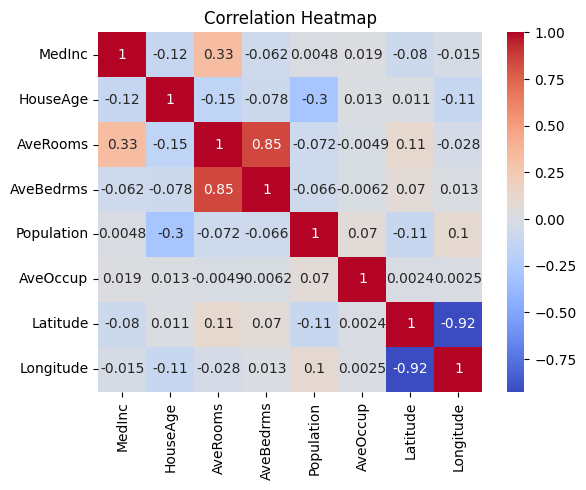

In [ ]:
# 히트맵 그리기
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(cdf.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

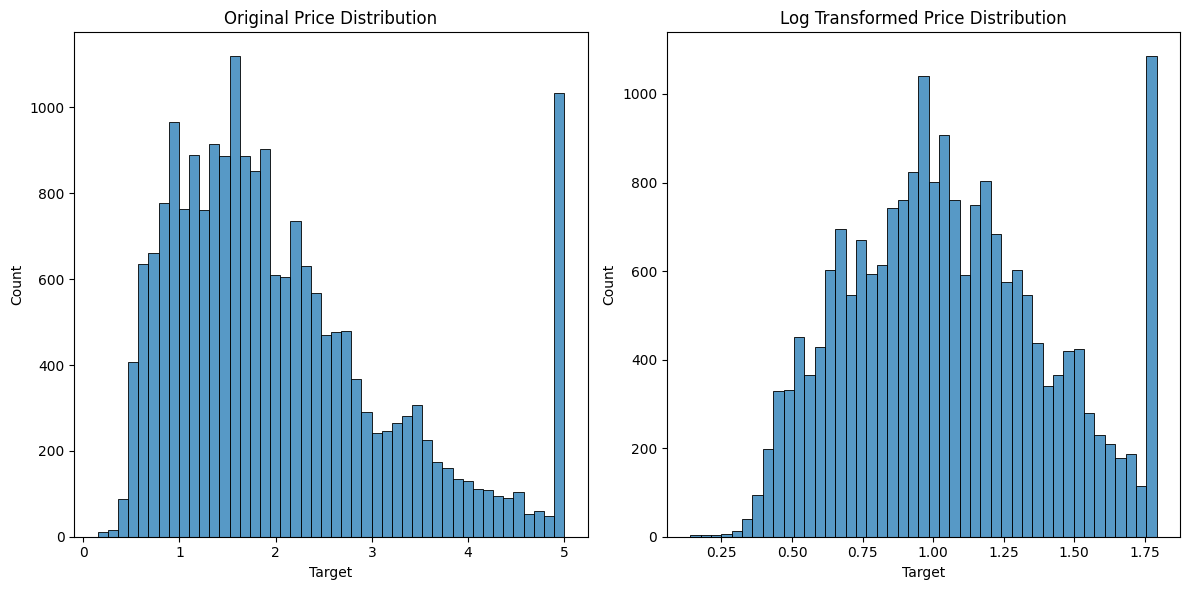

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1행 2열의 서브플롯 생성
fig, axs = plt.subplots(figsize=(12, 6), ncols=2, nrows=1)

# 원래 PRICE의 분포
sns.histplot(df['Target'], ax=axs[0])
axs[0].set_title('Original Price Distribution')

# 로그 변환된 PRICE의 분포
y_log = np.log1p(df['Target'])
sns.histplot(y_log, ax=axs[1])
axs[1].set_title('Log Transformed Price Distribution')

plt.tight_layout()
plt.show()

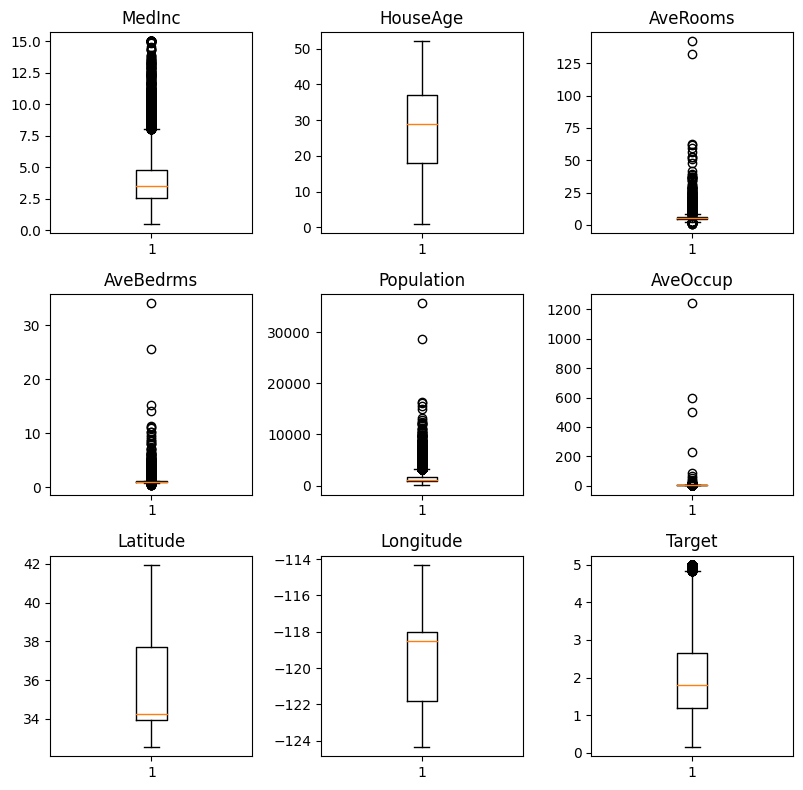

In [ ]:
# 박스플롯 그리기
plt.figure(figsize=(8, 8))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

cross_val_score는 모델을 자동으로 학습시키고 평가하여, 각 교차 검증 단계에서의 성능을 알려준다. 하지만 이 함수는 최종적으로 학습된 모델을 반환하지 않기 때문에, 전체 훈련 데이터셋에 대해 별도로 모델을 학습시켜야 한다.

먼저 데이터를 훈련 세트와 테스트 세트로 분할한 후, 교차 검증을 통해 모델 성능을 평가합니다. 이후 전체 훈련 세트에 대해 모델을 학습시키고, 테스트 세트를 사용하여 최종 성능을 평가합니다.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 교차 검증을 통한 모델 평가
model = LogisticRegression(max_iter=200)
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

# 전체 훈련 세트로 모델 학습
model.fit(X_train, y_train)

# 테스트 세트로 모델 성능 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)

Cross-validation scores: [0.9047619  1.         1.         0.9047619  0.95238095]
Mean accuracy: 0.9523809523809523
Test set accuracy: 0.9777777777777777


#### 이상치 처리 여부 판단
평균 제곱 오차(MSE)가 향상(감소)되지만 이상값을 제거한 후 R-제곱 점수가 약간 나빠지는 것을 관찰하면 이는 회귀 모델에 대한 이상값의 미묘한 영향을 나타낸다.

최선의 조치를 해석하고 결정하는 방법

MSE 및 R-제곱 이해:

- MSE는 관찰된 실제 결과와 모델 예측 간의 평균 제곱 차이를 측정. MSE가 낮을수록 평균 오류가 더 작다는 것을 의미하므로 더 나은 적합성을 나타낸다.
- R-제곱은 독립 변수에서 예측 가능한 종속 변수의 분산 비율을 측정. 이는 실제 값에 대한 예측 세트의 적합도를 나타낸다. 그러나 R-제곱이 더 높다고 해서 반드시 모델이 더 좋다는 의미는 아니다.

이상치의 영향:
- 이상값을 제거하면 대부분의 데이터 포인트에 대해 모델이 더 정확해져서 MSE가 줄어들 수 있다. 그러나 이상치가 데이터의 특정 측면(이상치가 아님)을 나타내는 경우 이를 제거하면 모델의 일반화가 어려워져 R-제곱이 약간 낮아질 수 있다.

결정 기준:
- 모델 목적: 모델의 목적이 일반적인 사례를 정확하게 예측하는 것이고 이상값이 드물거나 예외적인 경우에는 낮은 MSE에 우선순위를 두는 것이 더 적절할 수 있다.
- 데이터 표현: 이상값이 실제 값이고 데이터의 중요한 변동을 나타내는 경우 더 높은 MSE에도 불구하고 모든 데이터에서 모델 예측 능력의 무결성을 유지하려면 이상값을 유지해야 할 수 있다.

도메인 지식:
- 도메인을 이해하면 이상값이 변칙인지 아니면 데이터의 필수 부분인지에 대한 통찰력을 얻을 수 있다. 예를 들어, 부동산에서는 가치가 매우 높은 부동산이 드물지만 여전히 고려해야 할 중요한 자산이다.
대체 접근 방식:

결론적으로 이상값을 제거하거나 유지하는 결정은 통계적 증거, 모델의 목적, 도메인 지식, 모델 사용에 대한 실제 고려 사항의 조합을 기반으로 해야 한다. 모든 경우에 적용되는 일률적인 답변은 없으며, 종종 가장 좋은 접근 방식은 여러 요소를 고려하고 도메인 전문가와 상담하는 것이다.

#### 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷
- 회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 필요가 있음
- 선형 모형의 비용함수는 RSS(실제 값과 예측값의 차이)를 최소화하는 것만 고려한 결과 테스트 데이터 세트 예측 성능 저하 초래
- RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이루게 해야 함(최적모델을 위한 Cost 함수 구성요소 = 학습데이터 잔차 오류 최소화 + 회귀 계수 크기 제어)
- 회귀 계수 값의 크기를 조절하기 위하여 비용 함수에 알파 값으로 패널티를 부여해 과적합을 개선하는 방식을 규제라고 함
- alpha값을 크게 하면 비용 함수는 회귀 계수 W의 값을 작게 해 과적합을 개선할 수 있으며 alpha값을 작게 하면 회귀 계수 W의 값이 커져도 어느정도 상쇄가 가능하므로 학습데이터 적합을 더 개선
- 비용함수에 alpha값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제라고 한다.
- 규제는 크게 L2 방식과 L1 방식으로 구분되며 전자를 적용한 회귀를 릿지, 후자를 적용한 것이 라쏘임
- L2는 W의 제곱에 패널티를 부여하며 L1은 W의 절댓값에 패널티 부여
- 엘리스틱넷 회귀는 L2 규제와 L1 규제를 결합한 회귀

L1 규제 (Lasso 회귀)

- L1 규제는 Lasso(L1) 회귀에서 사용. 이 규제 방식은 모델의 손실 함수에 가중치의 절대값(|w|)의 합을 추가. 수학적으로 L1 규제는 다음과 같이 표현:

  $ 비용 함수 목표 = Min(손실 함수 + α∑∣w∣) $

  α는 규제 강도를 조절하는 매개변수입니다.
- L1 규제의 주요 특징은 모델의 일부 가중치를 정확히 0으로 만들 수 있다는 것. 이는 불필요한 특성의 가중치를 제거하여 모델을 단순화하고, 결과적으로 특성 선택(feature selection)의 효과를 가지게 된다.

L2 규제 (Ridge 회귀)
- L2 규제는 Ridge(L2) 회귀에서 사용. 이 규제는 모델의 손실 함수에 가중치의 제곱의 합을 추가. 수학적으로 L2 규제는 다음과 같이 표현:

  $ 비용 함수 목표 = Min(손실 함수 + α∑w^2) $

  α 역시 규제 강도를 조절하는 매개변수이다.
- L2 규제의 주요 특징은 가중치의 크기를 제한하여 모델의 복잡도를 감소시키는 것. L2 규제는 가중치를 완전히 0으로 만들지는 않지만, 가중치 값을 줄여 과적합을 방지하는 데 도움을 준다.

요약

- Lasso 회귀(L1 규제): 불필요한 특성의 가중치를 0으로 만들어 특성 선택의 효과를 가짐.
- Ridge 회귀(L2 규제): 모든 가중치를 비슷한 수준으로 작게 유지하여 과적합 방지.
- 규제 강도: α는 모델의 복잡도와 규제 사이의 균형을 조절하는 중요한 하이퍼 파라미터로, 적절한 값을 찾기 위해 교차 검증 등의 방법을 사용할 수 있다.

boston data
- CRIM: 도시별 1인당 범죄율
- ZN: 25,000 평방피트를 초과하는 주거 지역의 비율
- INDUS: 비소매상업지역 토지 비율
- CHAS: 찰스강에 대한 더미 변수 (강의 경계에 위치하면 1, 아니면 0)
- NOX: 산화질소 농도 (천만 분의 일)
- RM: 주택 1가구당 평균 방의 개수
- AGE: 1940년 이전에 건축된 소유주택의 비율
- DIS: 보스턴의 5개 고용 센터까지의 가중 거리
- RAD: 방사형 도로까지의 접근성 지수
- TAX: 10,000달러 당 재산세율
- PTRATIO: 도시별 학생-교사 비율
- B: 1000(Bk - 0.63)^2 여기서 Bk는 도시별 흑인의 비율을 의미
- LSTAT: 인구 중 하위 계층의 비율(%)
- MEDV: 본인 소유의 주택 가격(중앙값) (단위: $1000)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

# 보스턴 데이터 셋 불러오기
boston = fetch_openml(name="Boston", version=1, parser='auto')

# 데이터 셋을 데이터 프레임으로
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  PRICE    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [ ]:
# 필요한 feature이면 dtype 변환
for col in boston_df.columns:
    if boston_df[col].dtype.name == 'category':
        # 'category 타입을 먼저 수치형으로 변환 -> 범주형 데이터는 모델에 직접 사용할 수 없기 때문에 수치형으로 변환
        boston_df[col] = boston_df[col].cat.codes
        # 데이터 타입을 float으로 변경
        boston_df[col] = boston_df[col].astype(float)

In [ ]:
# # 필요없는 feature이면 삭제
# boston_df.drop(['CHAS','RAD'], axis=1, inplace=True)

In [ ]:
# 릿지 회귀
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

X_data = boston_df.drop(['PRICE'], axis=1, inplace=False)
y_target = boston_df['PRICE']

ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(f'5 folds의 개별 Negative MSE scores: {np.round(neg_mse_scores, 3)}')
print(f'5 folds의 개별 RMSE scores: {np.round(rmse_scores, 3)}')
print(f'5 folds의 평균 RMSE scores: {round(avg_rmse, 3)}')

5 folds의 개별 Negative MSE scores: [-11.771 -28.005 -32.521 -78.612 -20.685]
5 folds의 개별 RMSE scores: [3.431 5.292 5.703 8.866 4.548]
5 folds의 평균 RMSE scores: 5.568


Task_2_0730 이후

Q. 라쏘 회귀로 알파의 변화에 따른 RMSE와 회귀계수의 변화를 출력하세요(사용자 함수 적용)



In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

boston = fetch_openml(name="Boston", parser='auto', version=1)
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.drop(['CHAS','RAD'],axis=1,inplace=True)
boston_df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


In [ ]:
alphas = [0, 0.1, 1, 10, 100]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)

    neg_mse_scores = cross_val_score(ridge, X_data, y_target,\
                                    scoring="neg_mean_squared_error"\
                                    ,cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {}일 때 5 folds의 평균 RMSE : {:.3f}'.format(alpha,\
                                                         avg_rmse))

alpha 0일 때 5 folds의 평균 RMSE : 5.717
alpha 0.1일 때 5 folds의 평균 RMSE : 5.700
alpha 1일 때 5 folds의 평균 RMSE : 5.641
alpha 10일 때 5 folds의 평균 RMSE : 5.568
alpha 100일 때 5 folds의 평균 RMSE : 5.499


In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('######', model_name, '######')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha=param)
        else : model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print(f'alpha {param}일 때 5 folds의 평균 RMSE: {avg_rmse}')
        model.fit(X_data, y_target)
        coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
        colname = 'alpha:' + str(param)
        coeff_df[colname] = coeff
    return coeff_df

In [ ]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)
coeff_lasso_df

###### Lasso ######
alpha 0.07일 때 5 folds의 평균 RMSE: 5.63975318642497
alpha 0.1일 때 5 folds의 평균 RMSE: 5.639696014167153
alpha 0.5일 때 5 folds의 평균 RMSE: 5.721165611229234
alpha 1일 때 5 folds의 평균 RMSE: 5.910564972979698
alpha 3일 때 5 folds의 평균 RMSE: 6.225662896892307


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
CRIM,-0.060899,-0.060272,-0.047400,-0.027592,-0.000000
ZN,0.044466,0.044379,0.043056,0.043497,0.036646
INDUS,-0.100872,-0.096489,-0.065961,-0.035079,-0.000000
CHAS,1.814288,1.342789,0.000000,0.000000,0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
RM,4.041496,3.958515,2.765466,1.230766,0.000000
AGE,-0.014060,-0.012398,0.001813,0.018729,0.042256
DIS,-1.231606,-1.215476,-0.987331,-0.693531,-0.000000
RAD,0.073730,0.067353,0.000000,0.000000,0.000000
TAX,-0.001620,-0.001739,-0.002674,-0.003469,-0.005808


In [ ]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('ElasticNet', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)
coeff_lasso_df

###### ElasticNet ######
alpha 0.07일 때 5 folds의 평균 RMSE: 5.5903593663528115
alpha 0.1일 때 5 folds의 평균 RMSE: 5.580020171066973
alpha 0.5일 때 5 folds의 평균 RMSE: 5.5950260435420205
alpha 1일 때 5 folds의 평균 RMSE: 5.773112322207657
alpha 3일 때 5 folds의 평균 RMSE: 6.137958613436409


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
CRIM,-0.060944,-0.060245,-0.049926,-0.035752,-0.000000
ZN,0.045591,0.045875,0.046041,0.045563,0.036390
INDUS,-0.105402,-0.103734,-0.090124,-0.063498,-0.000000
CHAS,1.619638,1.247154,0.000000,0.000000,0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
RM,3.817480,3.653256,2.103637,1.070492,0.000000
AGE,-0.012495,-0.010434,0.006584,0.019592,0.042696
DIS,-1.244686,-1.231931,-1.028697,-0.771315,-0.030723
RAD,0.081576,0.077310,0.000000,0.000000,0.000000
TAX,-0.001503,-0.001560,-0.002155,-0.002844,-0.005168


- 알파는 0 이상의 값으로 설정. 구체적인 범위는 특정한 제한이 있는 것은 아니며 적절한 값을 찾는 것은 모델의 성능과 데이터에 따라 다르다.
- 알파가 0일 경우 규제가 없는 것과 동일. 알파가 증가함에 따라 규제의 강도가 강해지고 모델의 가중치에 대한 제약이 커진다. 이는 과적합을 방지하지만 너무 큰 알파 값은 과소적합을 야기할 수 있다.

### 회귀 트리
- 회귀 함수를 기반으로 하지 않고 결정 트리와 같이 트리를 기반으로 하는 회귀 방식
- 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측
- 리프 노드에서 예측 결정 값을 만드는 과정에서 분류 트리가 특정 클래스 레이블을 결정하는 것과 달리 회귀 트리는 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산
- 결정트리, 랜덤 포레스트, GBM, XGBOOST, LIGHTGBM 등 트리 기반의 알고리즘은 분류뿐만 아니라 회귀도 가능한데 트리 생성이 CART(Classification And Regression Trees)에 기반하고 있기 때문이며 CART는 분류뿐만 아니라 회귀도 가능하게 해주는 트리 생성 알고리즘임

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

boston = fetch_openml(name="Boston", parser='auto', version=1)
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.drop(['CHAS','RAD'],axis=1,inplace=True)
boston_df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from math import sqrt

y_target = boston_df.PRICE
X_data = boston_df.drop(['PRICE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=42)
rf_reg = RandomForestRegressor(random_state=0,n_estimators=1000)
rf_reg.fit(X_train, y_train)
pred_rf = rf_reg.predict(X_test)

mse = mean_squared_error(y_test, pred_rf)
rmse = sqrt(mse)
r2 = r2_score(y_test, pred_rf)
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R-Squared: {r2:.2f}')

MSE: 9.32
RMSE: 3.05
R-Squared: 0.87


In [ ]:
from sklearn.model_selection import cross_val_score

y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis=1, inplace=False)

rf = RandomForestRegressor(random_state=0,n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(f'5 교차 검증의 개별 Negative MSE scores: {np.round(neg_mse_scores, 3)}')
print(f'5 교차 검증의 개별 RMSE scores: {np.round(rmse_scores, 3)}')
print(f'5 교차 검증의 평균 RMSE scores: {round(avg_rmse)}')

5 교차 검증의 개별 Negative MSE scores: [ -7.977 -13.265 -20.579 -46.291 -18.92 ]
5 교차 검증의 개별 RMSE scores: [2.824 3.642 4.536 6.804 4.35 ]
5 교차 검증의 평균 RMSE scores: 4


Q. 주어진 data에 대하여 회귀 모델을 사용하여 에너지 사용량을 예측하는 모델을 Xgbregressor, Lightgbmregressor 모델을 이용하여 모델링 및 평가 (MAE, MSE, RMSE)를 수행하세요.

XGBRegressor는 회귀 문제에 특화된 모델로, 여러 하이퍼파라미터를 통해 성능을 최적화할 수 있다.

주요 하이퍼파라미터:

n_estimators: 부스팅을 위해 생성될 결정 트리의 개수입니다. 일반적으로 더 많은 트리가 모델의 성능을 향상시킬 수 있지만, 너무 많으면 과적합(overfitting)을 일으킬 수 있습니다.

learning_rate (eta): 각 부스팅 단계에서의 스텝 사이즈로, 새로운 트리의 기여도를 조절합니다. 낮은 값은 학습을 더 안정적으로 만들지만, 너무 낮으면 많은 트리가 필요하게 되고, 이는 과적합을 초래할 수 있습니다.

max_depth: 각 트리의 최대 깊이를 제한합니다. 깊은 트리는 더 복잡한 패턴을 학습할 수 있지만, 과적합의 위험이 있습니다.

min_child_weight: 자식 노드를 분할하기 위한 인스턴스 가중치(합)의 최소값입니다. 이 값을 크게 설정하면 더 보수적인 모델이 생성됩니다.

gamma (min_split_loss): 리프 노드를 추가로 분할하기 위한 최소 손실 감소 값입니다. 큰 값은 모델이 더 보수적이 되도록 합니다.

subsample: 각 트리를 훈련할 때 사용할 데이터 샘플의 비율입니다. 이는 과적합을 방지하는 데 도움이 됩니다.

colsample_bytree/colsample_bylevel/colsample_bynode: 트리, 레벨, 노드를 기준으로 각각 훈련에 사용할 특성(열)의 비율입니다. 이를 통해 과적합을 줄일 수 있습니다.

lambda (reg_lambda): L2 정규화 항의 가중치입니다. 이는 모델의 복잡도를 제한하여 과적합을 방지하는 데 도움이 됩니다.

alpha (reg_alpha): L1 정규화 항의 가중치입니다. 불필요한 특성의 가중치를 0으로 만들어 모델을 더 단순하게 만듭니다.

scale_pos_weight: 불균형 데이터셋을 다룰 때 양성 클래스의 가중치를 조절합니다. 주로 분류 문제에서 사용됩니다.

objective: 최적화할 손실 함수를 지정합니다. 회귀 문제에서는 reg:squarederror, reg:linear, reg:gamma 등이 사용될 수 있습니다.

random_state: 결과의 재현 가능성을 위한 난수 시드입니다.

 LightGBM의 여러 하이퍼파라미터를 통해 성능을 조정할 수 있다.

 주요 하이퍼파라미터:

 n_estimators: 부스팅을 위해 생성될 결정 트리의 개수입니다. 더 많은 트리는 일반적으로 모델의 성능을 향상시킬 수 있으나, 너무 많으면 과적합을 일으킬 수 있습니다.

learning_rate: 각 부스팅 단계에서의 업데이트 크기를 조절합니다. 낮은 학습률은 학습 과정을 더 안정적으로 만들 수 있지만, 충분한 성능을 달성하기 위해 더 많은 트리가 필요할 수 있습니다.

max_depth: 트리의 최대 깊이를 제한합니다. 깊은 트리는 더 복잡한 패턴을 학습할 수 있지만, 과적합의 위험을 증가시킵니다.

num_leaves: 하나의 트리가 가질 수 있는 최대 리프의 수입니다. LightGBM에서는 이 값을 통해 트리의 복잡성을 조절합니다. num_leaves의 값이 크면 모델의 복잡도가 증가하므로, 과적합에 주의해야 합니다.

min_child_samples (min_data_in_leaf): 리프 노드가 가지고 있어야 할 최소 데이터 수입니다. 과적합을 방지하기 위해 사용됩니다.

min_child_weight: 자식 분할을 가지기 위한 인스턴스 가중치 합의 최소값입니다. 더 큰 값은 모델을 더 보수적으로 만듭니다.

subsample (bagging_fraction): 트리를 구축할 때 사용할 데이터 샘플의 비율입니다. 이는 과적합을 방지하는 데 도움이 됩니다.

colsample_bytree (feature_fraction): 트리를 구축할 때 사용할 특성(열)의 비율입니다. 이를 통해 과적합을 방지하고 학습 속도를 향상시킬 수 있습니다.

reg_alpha (lambda_l1): L1 정규화 항의 가중치입니다. 이는 모델의 복잡도를 줄이는 데 도움이 됩니다.

reg_lambda (lambda_l2): L2 정규화 항의 가중치입니다. 이는 또한 모델의 복잡도를 줄이고 과적합을 방지하는 데 도움이 됩니다.

max_bin: 수치형 변수를 이산화(discretization)할 때 사용되는 최대 bin의 수입니다. 이 값이 크면 모델의 정확도는 향상될 수 있지만, 과적합의 위험과 메모리 사용량이 증가합니다.

boosting_type: 부스팅 타입을 지정합니다. LightGBM은 gbdt (기본값), rf (랜덤포레스트), dart, goss 등 여러 부스팅 타입을 지원합니다.

objective: 최적화할 손실 함수를 지정합니다. 회귀 문제의 경우 regression, regression_l1, `huber

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 가상의 데이터 생성
np.random.seed(42)
data_size = 1000
data = {
    'area': np.random.uniform(1000, 3000, data_size),
    'type': np.random.randint(0, 2, data_size),
    'location': np.random.randint(0, 3, data_size),
    'energy_usage': np.random.uniform(200, 600, data_size)  # kWh
}
df = pd.DataFrame(data)
df.head()

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


,area,type,location,energy_usage
0,1749.080238,0,1,561.443138
1,2901.428613,1,1,293.105259
2,2463.987884,1,0,522.958412
3,2197.316968,1,0,223.637556
4,1312.037281,1,1,559.538955


In [ ]:
X = df[['area', 'type', 'location']]
y = df['energy_usage']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 훈련
# objective 매개변수는 모델이 최소화하려는 손실함수나 최적화할 목표
# xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_regressor = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
xgb_regressor.fit(X_train, y_train)

# LightGBM 모델 훈련
# lgbm_regressor = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbose=-1)
lgbm_regressor = LGBMRegressor(objective='regression', n_estimators=100, learning_rate=0.1, random_state=42, verbose=-1)
lgbm_regressor.fit(X_train, y_train)

# 예측 및 평가
y_pred_xgb = xgb_regressor.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f'XGBoost MAE: {mae_xgb:.2f}')
print(f'XGBoost MSE: {mse_xgb:.2f}')
print(f'XGBoost RMSE: {rmse_xgb:.2f}')

y_pred_lgbm = lgbm_regressor.predict(X_test)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))

print(f'LightGBM MAE: {mae_lgbm:.2f}')
print(f'LightGBM MSE: {mse_lgbm:.2f}')
print(f'LightGBM RMSE: {rmse_lgbm:.2f}')

XGBoost MAE: 100.91
XGBoost MSE: 14651.81
XGBoost RMSE: 121.04
LightGBM MAE: 97.31
LightGBM MSE: 13658.11
LightGBM RMSE: 116.87
